# Allysa Webber

## Research questions
Research question 1: How do housing, education, and community wellbeing differ with different community demographics? 
Research question 2: Are there significant differences in the mean temperature values in January from 2011-2013?
Research question 3: How do snowfall, precipitation and temperature interact with each other?
Research question 4: What is the spacial distribution of temperature and snowfall values in british columbia?

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [31]:
#import the wellbeing files
wellbeingindex = pd.read_csv('/Users/allysawebber/Documents/School/data301/project-group33/data/raw/CWindex.csv', encoding="ISO-8859-1")

In [30]:
#take a look at the different areas
wellbeingindex['CSD Name / Nom de la SDR 2011'].unique()

array(['Division No.  1, Subd. V', 'Portugal Cove South', 'Trepassey',
       ..., 'Gjoa Haven', 'Taloyoak', 'Kitikmeot, Unorganized'],
      dtype=object)

In [33]:
wellbeingindex.describe()

,CSD Code / Code de la SDR 2011,Census Population / Population de recensement 2011,GNR / TGN 2011,Income / Revenu 2011,Education / Scolarité 2011,Housing / Logement 2011,Labour Force Activity / Activité sur le marché du travail 2011,CWB / IBC 2011
count,5.253000e+03,4.417000e+03,4417.000000,3752.000000,3752.000000,3752.000000,3752.000000,4417.000000
mean,3.649022e+06,7.572630e+03,38.447272,69.635661,51.707623,90.972548,82.924574,73.063844
std,1.617802e+06,6.054266e+04,15.691078,10.595555,11.534866,10.357334,9.275051,9.303556
min,1.001101e+06,6.500000e+01,0.000000,21.000000,6.000000,27.000000,33.000000,26.000000
25%,2.438055e+06,3.950000e+02,27.400000,66.000000,46.000000,91.000000,78.750000,70.000000
50%,3.558075e+06,8.990000e+02,39.500000,71.000000,53.000000,94.000000,85.000000,75.000000
75%,4.718809e+06,2.634000e+03,49.800000,76.000000,59.000000,96.000000,89.000000,79.000000
max,6.208098e+06,2.615060e+06,88.600000,100.000000,89.000000,100.000000,100.000000,93.000000


In [33]:
#clean up the files
wellbeingindex = wellbeingindex.apply(lambda x: x.replace({'Non-Indigenous Community / Communauté non-Autochtone':'Non-Indigenous Community',
                            'First Nations Community / Communauté des Premières Nations':'First Nations Community',
                           'Inuit Community / Communauté inuite': 'Inuit Community'}, regex=True))

In [34]:
wellbeingindex=wellbeingindex.rename(columns={'Community Type / Type de communauté 2011': 'Community Type',
                            'CWB / IBC 2011': 'CWB', 'Census Population / Population de recensement 2011':'Population size',
                            'Income / Revenu 2011':'Revenue', 'Education / Scolarité 2011':'Education',
                            'Housing / Logement 2011':'Housing',
                            'CSD Name / Nom de la SDR 2011':'Area'})

In [35]:
wellbeingindex=(wellbeingindex.drop(columns=['CSD Code / Code de la SDR 2011','Labour Force Activity / Activité sur le marché du travail 2011','GNR / TGN 2011'], axis=1))

In [23]:
wellbeingindex

,Area,Population size,Revenue,Education,Housing,CWB,Community Type
0,"Division No. 1, Subd. V",NaN,NaN,NaN,NaN,NaN,Non-Indigenous Community
1,Portugal Cove South,160.0,NaN,NaN,NaN,65.0,Non-Indigenous Community
2,Trepassey,570.0,77.0,42.0,95.0,72.0,Non-Indigenous Community
3,St. Shott's,NaN,NaN,NaN,NaN,NaN,Non-Indigenous Community
4,"Division No. 1, Subd. U",1489.0,76.0,54.0,97.0,78.0,Non-Indigenous Community
...,...,...,...,...,...,...,...
5248,Umingmaktok,NaN,NaN,NaN,NaN,NaN,Inuit Community
5249,Cambridge Bay,1608.0,78.0,43.0,74.0,69.0,Inuit Community
5250,Gjoa Haven,1279.0,63.0,28.0,49.0,52.0,Inuit Community
5251,Taloyoak,899.0,58.0,20.0,60.0,51.0,Inuit Community


In [39]:
wellbeingindex['CWB'].max(),wellbeingindex['CWB'].min()

(93.0, 26.0)

### How do housing, education, and community wellbeing differ with different community demographics?


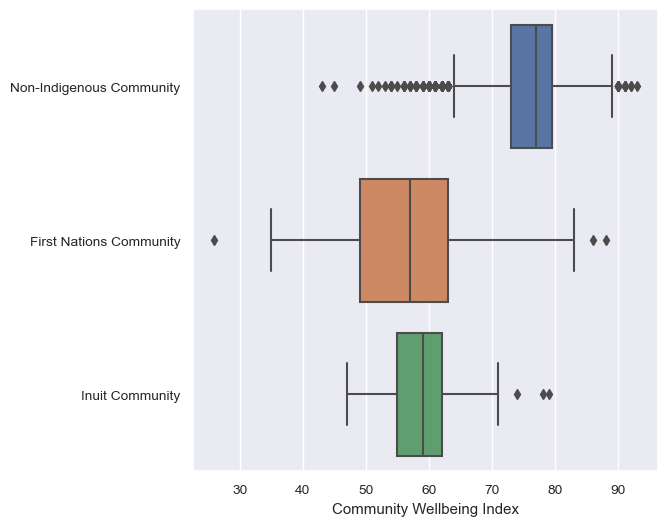

In [54]:
#visualize 
plt.figure(figsize=(6,6))
sns.set(font_scale=.9)
wellbeingindex_plot = sns.boxplot(x=wellbeingindex['CWB'],
                                    y = wellbeingindex['Community Type'],
                                     ).set(xlabel='Community Wellbeing Index', ylabel=None)

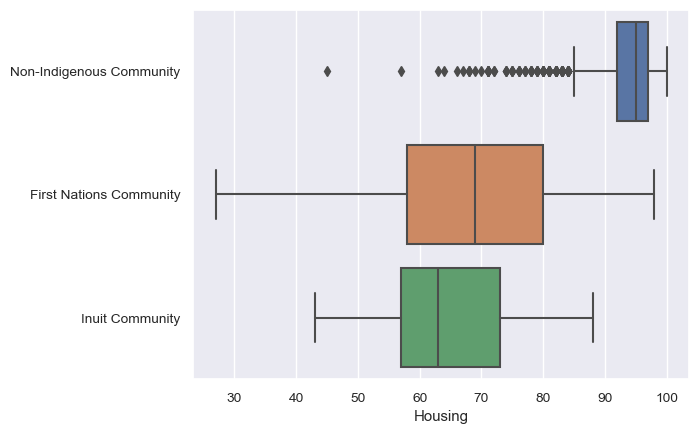

In [63]:
plot = sns.boxplot(x=wellbeingindex['Housing'],
                                    y= wellbeingindex['Community Type'],
                                     ).set(xlabel='Housing',ylabel=None)

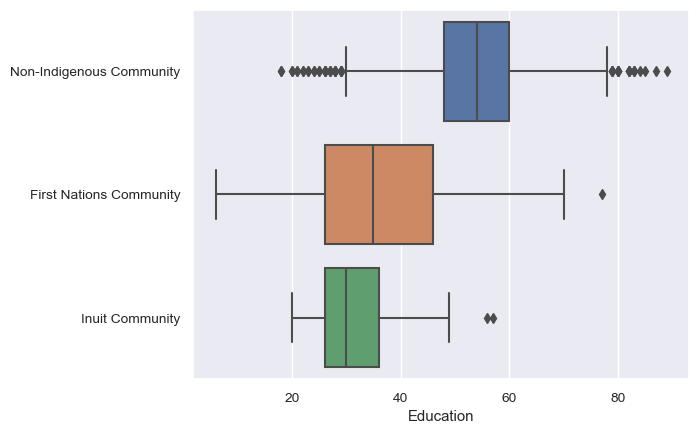

In [57]:
plot = sns.boxplot(x=wellbeingindex['Education'],
                                    y= wellbeingindex['Community Type'],
                                     ).set(xlabel='Education',ylabel=None)

#### Indigenous and inuit communites experience lower community well being scores, as well as lower housing and education.  

In [42]:
#import and concat the climate files with a loop
files= (glob('/Users/allysawebber/Documents/School/data301/data/*'))
df_list=[]

for i in files:
    print(i)
    df=pd.read_csv(i)
    df['year']=i[-8:-4]
    print(df)
    df_list.append(df)
df=pd.concat(df_list)

/Users/allysawebber/Documents/School/data301/data/climate2018.csv
        Long     Lat                Stn_Name  Clim_ID Prov_or_Ter    Tm  DwTm  \
0   -123.742  48.935               CHEMAINUS  1011500          BC   5.1   0.0   
1   -124.133  48.824  COWICHAN LAKE FORESTRY  1012040          BC   3.2   0.0   
2   -124.052  48.829           LAKE COWICHAN  1012055          BC   3.8  13.0   
3   -123.226  48.425        DISCOVERY ISLAND  1012475          BC   NaN   NaN   
4   -123.439  48.432       ESQUIMALT HARBOUR  1012710          BC   6.7   0.0   
..       ...     ...                     ...      ...         ...   ...   ...   
232 -122.597  58.836           FORT NELSON A  1192946          BC -18.5   0.0   
233 -122.574  58.841             FORT NELSON  1192948          BC -18.3   0.0   
234 -130.025  58.426        DEASE LAKE (AUT)  119BLM0          BC -15.5   0.0   
235 -133.700  59.567                   ATLIN  1200560          BC -11.4   2.0   
236 -136.367  59.450           PLEASANT CAM

In [43]:
#make sure they all imported
df['year'].unique()

array(['2018', '2019', '2022', '2023', '2021', '2020', '2011', '2012',
       '2013', '2017', '2016', '2014', '2015'], dtype=object)

In [44]:
#take a look at the files
df.head()

,Long,Lat,Stn_Name,Clim_ID,Prov_or_Ter,Tm,DwTm,D,Tx,DwTx,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,year
0,-123.742,48.935,CHEMAINUS,1011500,BC,5.1,0.0,NaN,11.5,0.0,...,0.0,NaN,0.0,25.0,NaN,NaN,NaN,400.2,0.0,2018
1,-124.133,48.824,COWICHAN LAKE FORESTRY,1012040,BC,3.2,0.0,-0.2,12.5,0.0,...,0.0,159.0,0.0,23.0,NaN,NaN,NaN,460.3,0.0,2018
2,-124.052,48.829,LAKE COWICHAN,1012055,BC,3.8,13.0,0.3,12.0,8.0,...,12.0,NaN,NaN,19.0,NaN,NaN,NaN,254.9,0.0,2018
3,-123.226,48.425,DISCOVERY ISLAND,1012475,BC,NaN,NaN,NaN,12.9,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4,-123.439,48.432,ESQUIMALT HARBOUR,1012710,BC,6.7,0.0,NaN,11.9,0.0,...,0.0,NaN,NaN,21.0,NaN,NaN,NaN,351.6,0.0,2018


In [45]:
df.describe()

,Long,Lat,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,DwP,S_G,Pd,BS,DwBS,BS%,HDD,CDD
count,6624.000000,6624.000000,6097.000000,6097.000000,1582.000000,6346.000000,6346.000000,6347.000000,6347.000000,2747.000000,2747.000000,5791.000000,3779.000000,5791.000000,9.000000,9.000000,6.000000,6097.000000,6097.0
mean,-107.643054,51.527185,-5.810792,1.963097,0.907901,5.762701,1.805862,-20.796975,1.785253,31.445650,3.037131,2.872561,24.100556,9.634778,49.322222,0.333333,79.166667,692.212810,0.0
std,22.113975,5.476269,8.992165,4.773249,2.118783,6.300098,4.545104,12.836126,4.537172,40.291872,5.996424,5.933104,30.498313,6.760172,12.950944,0.500000,23.455632,286.724159,0.0
min,-140.869000,41.949000,-36.300000,0.000000,-9.000000,-31.800000,0.000000,-53.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.500000,0.000000,39.000000,12.600000,0.0
25%,-123.459000,49.025000,-10.700000,0.000000,-0.400000,3.100000,0.000000,-31.500000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,44.900000,0.000000,77.250000,451.200000,0.0
50%,-117.633000,50.099000,-4.700000,0.000000,0.900000,6.500000,0.000000,-21.600000,0.000000,20.800000,0.000000,0.000000,17.000000,9.000000,50.800000,0.000000,79.000000,669.900000,0.0
75%,-91.816000,53.295000,1.300000,1.000000,2.100000,10.100000,1.000000,-9.500000,1.000000,45.300000,3.000000,2.000000,37.000000,14.000000,56.700000,1.000000,87.500000,864.800000,0.0
max,-52.753000,82.500000,9.100000,30.000000,9.300000,30.000000,30.000000,4.900000,30.000000,473.000000,30.000000,30.000000,311.000000,31.000000,63.900000,1.000000,111.000000,1683.800000,0.0


In [46]:
####some cleaning
#get rid of all other provinces
df= df[df['Prov_or_Ter'].str.contains('BC')]
#drop unneeded columns, rename columns, reorder rows.  
df =(df.drop(columns=['DwTm','DwP','DwTx','DwBS','DwS','DwTn','Tx','Tn','S_G','Pd','BS','HDD','CDD','P%N','BS%','S%N','D'],axis=1))
#rename columns
df=df.rename(columns={'Tm': 'Temp','S': 'Snow','P':'Precip', 'Stn_Name':'Location', 'Clim_ID':'Climate ID', 'Prov_or_Ter':'Province'})
#reorder rows by year
df.sort_values(by='year', ascending = True, inplace = True)

In [24]:
df

,Long,Lat,Location,Climate ID,Province,Temp,Snow,Precip,year
263,-125.767,58.930,MUNCHO LAKE,1195250,BC,-13.7,64.0,72.6,2011
169,-123.093,49.171,RICHMOND NATURE PARK,1106PF7,BC,4.3,0.0,157.7,2011
170,-123.303,49.106,SANDHEADS CS,1107010,BC,5.1,NaN,NaN,2011
171,-123.122,49.295,VANCOUVER HARBOUR CS,1108446,BC,4.8,NaN,255.6,2011
172,-123.182,49.195,VANCOUVER INT'L A,1108447,BC,4.2,16.1,186.3,2011
...,...,...,...,...,...,...,...,...,...
66,-122.955,50.129,WHISTLER,1048898,BC,-0.1,15.0,16.6,2023
67,-132.772,53.316,KINDAKUN ROCKS (AUT),1054222,BC,7.1,NaN,0.0,2023
68,-133.058,54.255,LANGARA,1054500,BC,5.5,0.0,156.4,2023
61,-124.500,49.834,POWELL RIVER A,1046391,BC,4.5,4.0,123.0,2023


In [49]:
#precipitation is an object currently, convert to numeric type
df['Precip']= pd.to_numeric(df['Precip'],errors='coerce')

In [51]:
#check min and max in the dataframe
df['Temp'].max(),df['Temp'].min()

df['Snow'].max(), df['Snow'].min()

df['Precip'].max(),  df['Precip'].max()  

(988.0, 988.0)

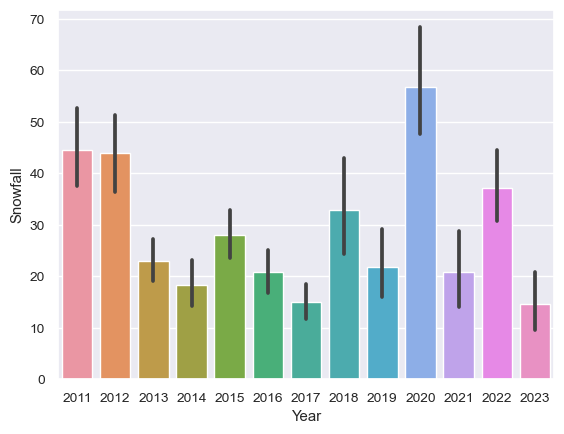

In [87]:
#look at snowfall in january across the years
sns.set(font_scale=.9)
snowfall_plot = sns.barplot(y=df['Snow'],
                                      x = df['year']
                                     ).set(ylabel='Snowfall', xlabel='Year')

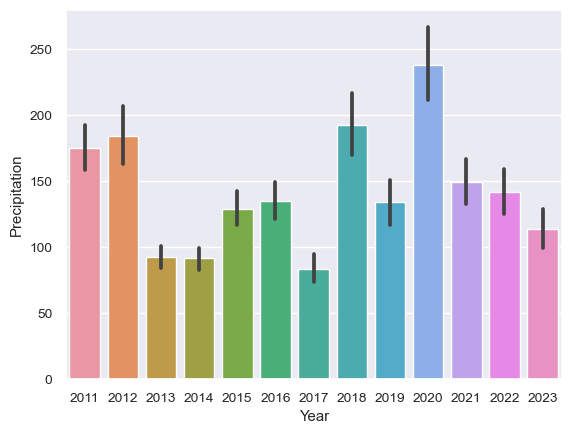

In [52]:
sns.set(font_scale=.9)
snowfall_plot = sns.barplot(y=df['Precip'],
                                      x = df['year']
                                     ).set(ylabel='Precipitation', xlabel='Year')

### Are there significant differences in the mean temperature values in January from 2011-2013?

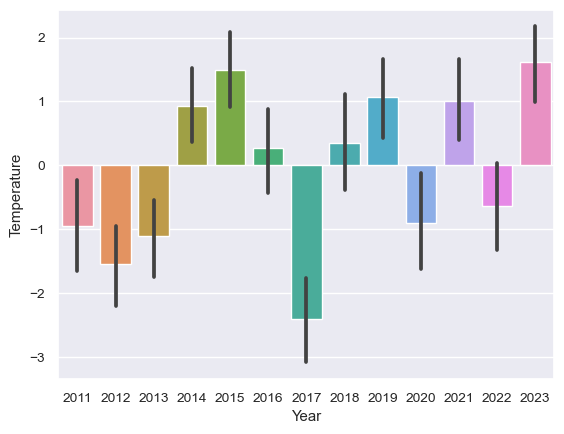

In [88]:
#look at temperature in january across the years
sns.set_style("whitegrid",{'axes.grid' : False})
sns.set(font_scale=.9)
temp_plot = sns.barplot(y=df['Temp'],
                                      x = df['year']
                                     ).set(ylabel='Temperature', xlabel='Year')

/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height sma

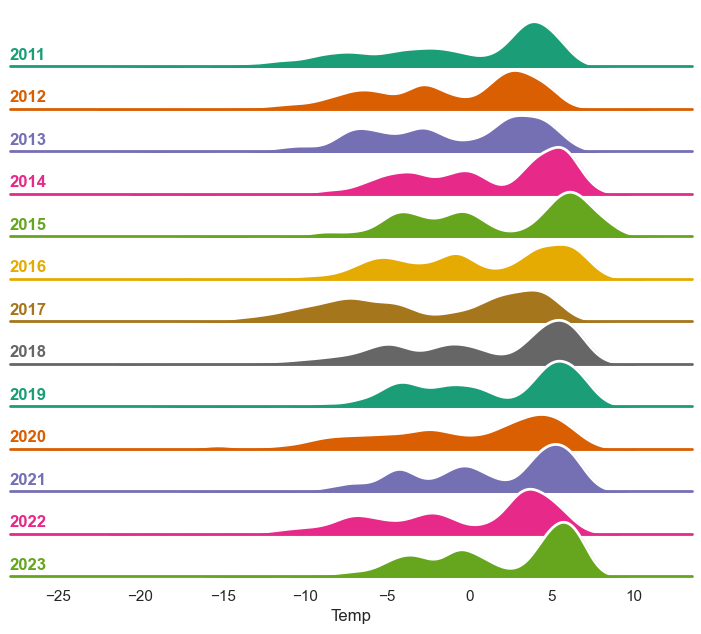

In [97]:
# try with ridgeline
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="year", hue="year", aspect=15, height=.5, palette='Dark2')

# Draw the densities in a few steps
g.map(sns.kdeplot, "Temp",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Temp", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Temp")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

#### Temperature values do not appear to have undergone a significant change in the years shown, however they do vary from year to year. It is likely that a longer time frame is required to visualize an increase in temperature. 

/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height sma

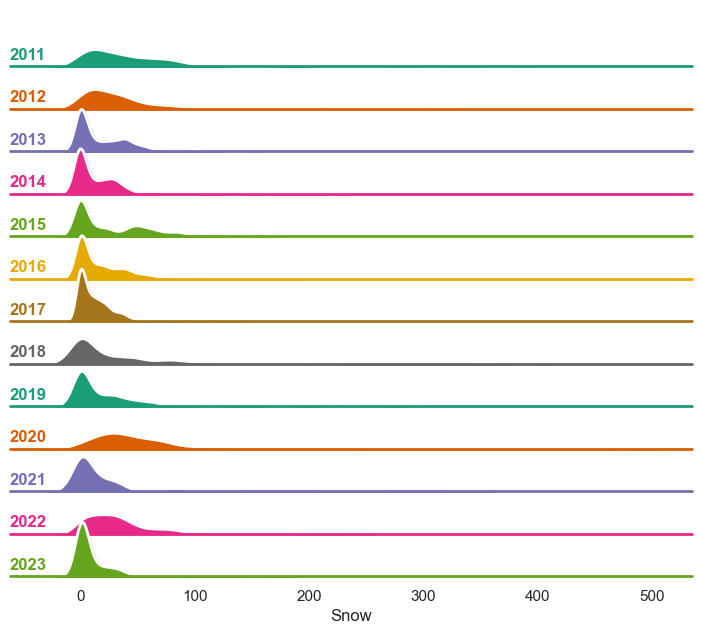

In [92]:
# try with ridgeline
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="year", hue="year", aspect=15, height=.5, palette='Dark2')

# Draw the densities in a few steps
g.map(sns.kdeplot, "Snow",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Snow", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Snow")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height sma

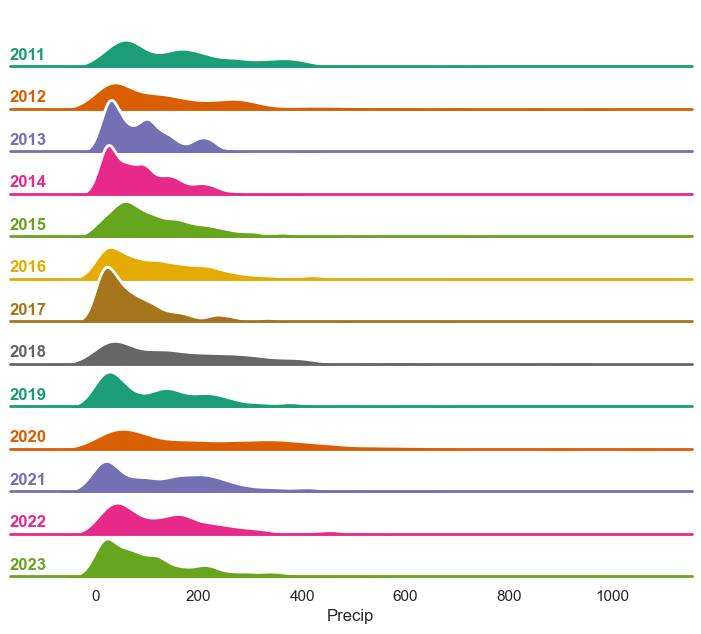

In [53]:
# try with ridgeline
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="year", hue="year", aspect=15, height=.5, palette='Dark2')

# Draw the densities in a few steps
g.map(sns.kdeplot, "Precip",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Precip", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Precip")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

### How do snowfall, precipitation and temperature interact with each other?

In [63]:
#look at how snowfall and temperature interact
meantemp = df.groupby('year')['Temp'].mean()
meantemp = pd.DataFrame(meantemp)

meansnow = df.groupby('year')['Snow'].mean()
meansnow = pd.DataFrame(meansnow)

meanprecip = df.groupby('year')['Precip'].mean()
meanprecip = pd.DataFrame(meanprecip)

meansdf = pd.merge(meansnow, meantemp, how="outer", on=['year'])
meansdf['Year'] = meansdf.index

newdf = pd.merge(meansdf, meanprecip, how="outer", on=['year'])
newdf

,Snow,Temp,Year,Precip
year,,,,
2011,44.624309,-0.945935,2011,175.250612
2012,43.885641,-1.539552,2012,183.993561
2013,22.887245,-1.113688,2013,92.328519
2014,18.304762,0.936466,2014,91.538235
2015,27.992391,1.491635,2015,129.236496
2016,20.772515,0.265504,2016,134.873864
2017,15.040127,-2.406148,2017,83.755645
2018,32.858394,0.355752,2018,192.882589
2019,21.826772,1.062281,2019,134.270183


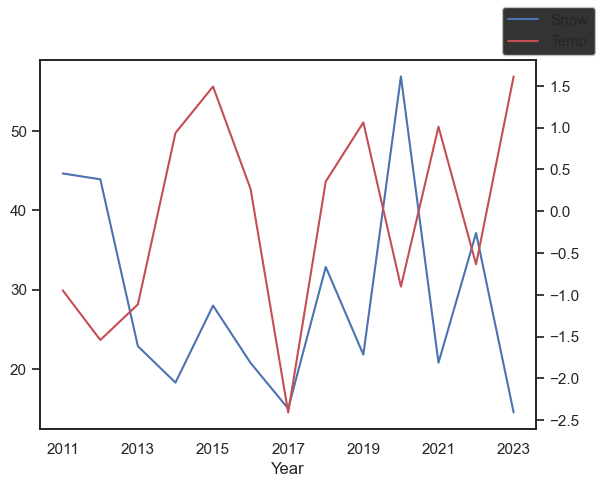

In [64]:
ax = newdf.plot(x="Year", y="Snow", legend=False)
ax2 = ax.twinx()
newdf.plot(x="Year", y="Temp", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

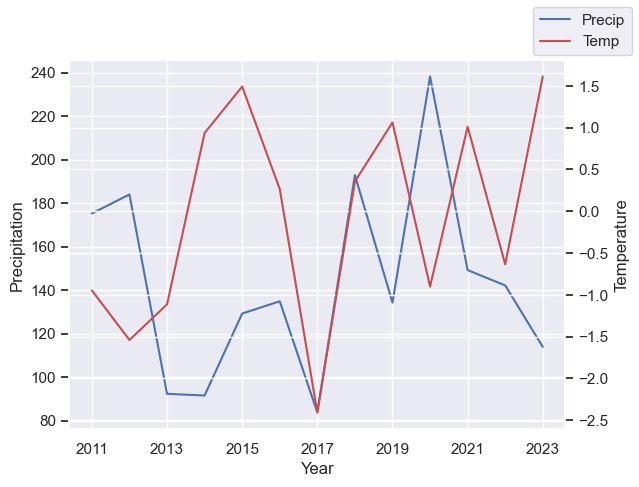

In [82]:
ax = newdf.plot(x="Year", y="Precip", legend=False)
ax2 = ax.twinx()
newdf.plot(x="Year", y="Temp", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set(xlabel='Year', ylabel='Precipitation')
ax2.set(ylabel='Temperature')
plt.show()


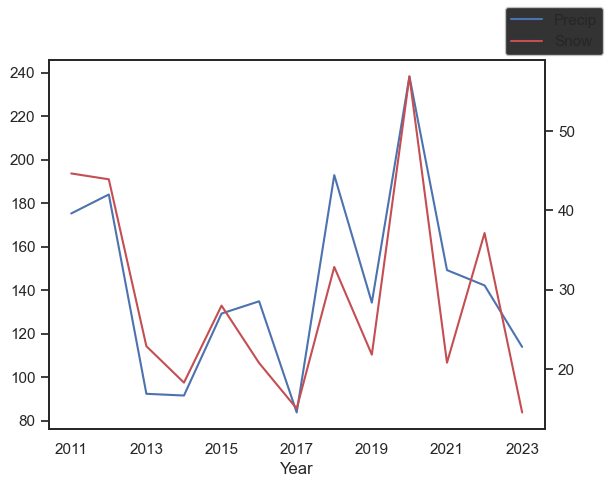

In [67]:
ax = newdf.plot(x="Year", y="Precip", legend=False)
ax2 = ax.twinx()
newdf.plot(x="Year", y="Snow", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

#### Temperature appears to have an inverse relationship with precipitation and snowfall, while precipiation and snowfall values mirror eachother in their values

### What is the spacial distribution of temperature values across British Columbia?

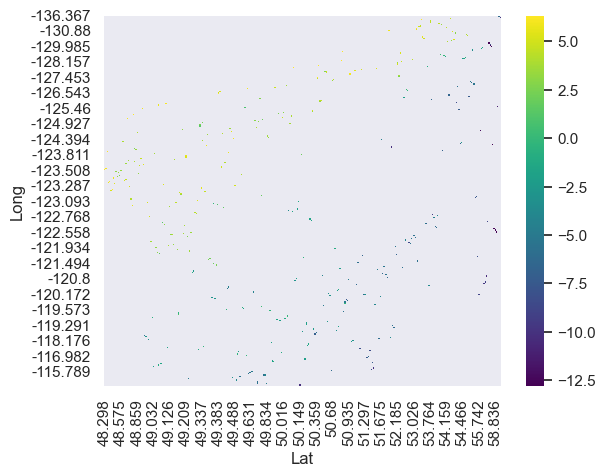

In [74]:
#try a heat map to show locations of temperatures. How has the distribution of temps changed through the years
result = df.pivot_table(index='Long', columns='Lat', values='Temp')

sns.heatmap(result, annot=False, cmap='viridis', robust=True)
plt.show()


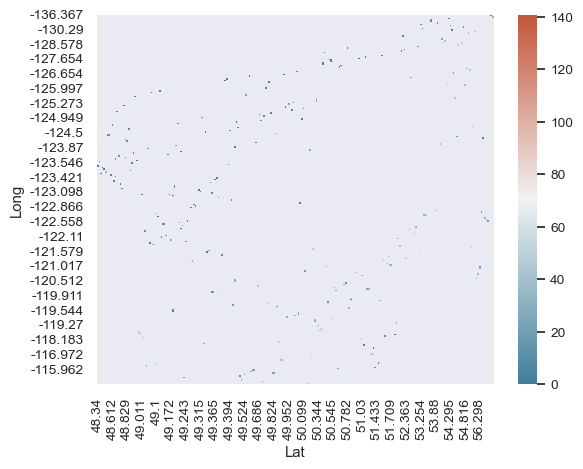

In [132]:
snow = df.reset_index().pivot_table(index='Long', columns='Lat', values='Snow')

sns.heatmap(snow, annot=False, cmap = sns.diverging_palette(230, 20, as_cmap=True), robust=True)
plt.show()

In [75]:
df.to_csv("df.csv", index=None)